## Orthogonality of the Trigonometric Basis Functions

We work in the inner-product space $(L^2([-\pi,\pi]))$ with
$$
\langle f, g \rangle = \int_{-\pi}^{\pi} f(x)\,g(x)\,dx.
$$
Our candidate basis is
$$
\{\,1,\;\cos(x),\;\sin(x),\;\dots,\;\cos((l-1)x),\;\sin((l-1)x),\;\cos(lx)\}.
$$

### 1. Constant vs. cos and sin

For $(k\ge1)$:
- $\cos(kx)$ is even with zero mean on $[-\pi,\pi]$, so
  $$
  \int_{-\pi}^{\pi}1\cdot\cos(kx)\,dx=0.
  $$
- $\sin(kx)$ is odd, so
  $$
  \int_{-\pi}^{\pi}1\cdot\sin(kx)\,dx=0.
  $$

### 2. Cos–Cos orthogonality

- **$k\neq j$**:
  $$
  \cos(kx)\cos(jx)
  = \tfrac12\bigl[\cos((k-j)x)+\cos((k+j)x)\bigr],
  $$
  and each $\cos(nx)$ is even with zero mean
  $\;\Longrightarrow\;\int_{-\pi}^{\pi}\cos(kx)\cos(jx)\,dx=0.$
- **$k=j\ge1$**:
  $$
  \cos^2(kx)=\frac{1+\cos(2kx)}{2},
  $$
  the $\cos(2kx)$-term has zero mean, so
  $$
  \int_{-\pi}^{\pi}\cos^2(kx)\,dx
  =\int_{-\pi}^{\pi}\tfrac12\,dx
  =\pi.
  $$

### 3. Sin–Sin orthogonality

- **$k\neq j$**:
  $$
  \sin(kx)\sin(jx)
  = \tfrac12\bigl[\cos((k-j)x)-\cos((k+j)x)\bigr],
  $$
  with each cosine even and zero-mean
  $\;\Longrightarrow\;\int_{-\pi}^{\pi}\sin(kx)\sin(jx)\,dx=0.$
- **$k=j\ge1$**:
  $$
  \sin^2(kx)=\frac{1-\cos(2kx)}{2}
  \quad\Longrightarrow\quad
  \int_{-\pi}^{\pi}\sin^2(kx)\,dx=\pi.
  $$

### 4. Sin–Cos cross terms

For all $(k,j\ge1)$:
- $\sin(kx)\cos(jx)$ is odd (odd $\times$ even)
  $\;\Longrightarrow\;\int_{-\pi}^{\pi}\sin(kx)\cos(jx)\,dx=0.$

---

Hence every distinct pair integrates to zero, and each function has nonzero norm ($\pi$ for sines/cosines, $2\pi$ for the constant). Rescaling by $1/\pi$ (and $1/2\pi$ for the constant) makes the set orthonormal.


In [2]:
import numpy as np

for m in [4, 6, 8]:
    x = 2*np.pi*np.arange(m)/m
    L = m//2

    Dcc = np.zeros((L+1, L+1))
    Dss = np.zeros((L+1, L+1))
    Dcs = np.zeros((L+1, L+1))

    for j in range(L+1):
        for k in range(L+1):
            Dcc[j,k] = (2/m) * np.sum(np.cos(j*x) * np.cos(k*x))
            Dss[j,k] = (2/m) * np.sum(np.sin(j*x) * np.sin(k*x))
            Dcs[j,k] = (2/m) * np.sum(np.sin(j*x) * np.cos(k*x))

    print(f"m = {m}")
    print("Dcc =\n", Dcc)
    print("Dss =\n", Dss)
    print("Dcs =\n", Dcs)
    print()


m = 4
Dcc =
 [[ 2.00000000e+00 -9.18485099e-17  0.00000000e+00]
 [-9.18485099e-17  1.00000000e+00  3.63373587e-17]
 [ 0.00000000e+00  3.63373587e-17  2.00000000e+00]]
Dss =
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.22464680e-16]
 [ 0.00000000e+00 -1.22464680e-16  1.04983185e-31]]
Dcs =
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.11022302e-16  6.12323400e-17  5.55111512e-17]
 [ 1.22464680e-16  1.22464680e-16 -3.67394040e-16]]

m = 6
Dcc =
 [[ 2.00000000e+00 -3.70074342e-17  2.40548322e-16  0.00000000e+00]
 [-3.70074342e-17  1.00000000e+00 -4.62592927e-17 -1.85037171e-16]
 [ 2.40548322e-16 -4.62592927e-17  1.00000000e+00 -1.85037171e-17]
 [ 0.00000000e+00 -1.85037171e-16 -1.85037171e-17  2.00000000e+00]]
Dss =
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -7.40148683e-17 -7.07050159e-17]
 [ 0.00000000e+00 -7.40148683e-17  1.00000000e+00 -2.12115048e-16]
 [ 0.00000000e+00 -7

In [5]:
import numpy as np

def hat(x):
    """The 2π-periodic ‘hat’ function on [0,2π]."""
    x = np.mod(x, 2*np.pi)
    return np.where(x <= np.pi, x, 2*np.pi - x)

# fine grid for error measurement: step = 0.01 * π
x_fine = np.arange(0, 2*np.pi + 1e-12, 0.01 * np.pi)
f_true = hat(x_fine)

print(f"{'ℓ':>4s}   {'n=2ℓ−1':>6s}   {'max error':>12s}")
print("-"*28)

for ell in [2, 4, 8, 16, 32]:
    m = 2 * ell
    # sample points and values
    xj = 2 * np.pi * np.arange(m) / m
    yj = hat(xj)

    # Fourier coefficients via DFT
    C = np.fft.fft(yj) / m

    # map k ∈ [0..m-1] to signed freqs in [–ℓ..ℓ]
    k = np.arange(m)
    k_mod = np.where(k <= ell, k, k - m)

    # evaluate interpolation on x_fine
    exp_mat = np.exp(1j * np.outer(k_mod, x_fine))  # shape (m, len(x_fine))
    pvals = np.real(C @ exp_mat)                    # weighted sum

    # measure and print max-norm error
    err = np.max(np.abs(pvals - f_true))
    print(f"{ell:4d}   {2*ell-1:6d}   {err:12.4e}")


   ℓ   n=2ℓ−1      max error
----------------------------
   2        3     3.3067e-01
   4        7     1.5371e-01
   8       15     7.5208e-02
  16       31     3.6362e-02
  32       63     1.7967e-02


Since we take
$$
\phi_k(x)=e^{ikx},
$$
note that the family $(\{\phi_k\}_{k\in\mathbb{Z}})$ is orthogonal on \($[-\pi,\pi]$\):
$$
\int_{-\pi}^{\pi}\phi_k(x)\,\overline{\phi_j(x)}\,dx
=\int_{-\pi}^{\pi}e^{i(k-j)x}\,dx
=2\pi\,\delta_{kj}.
$$
Hence the projection of \(f\) onto $\phi_k$ is
$$
\langle f,\phi_k\rangle
=\int_{-\pi}^{\pi}f(y)\,\overline{\phi_k(y)}\,dy
=\int_{-\pi}^{\pi}f(y)e^{-iky}\,dy,
$$
and since $(\langle\phi_k,\phi_k\rangle=2\pi)$, we set
$$
c_k
=\frac{\langle f,\phi_k\rangle}{\langle\phi_k,\phi_k\rangle}
=\frac{1}{2\pi}\int_{-\pi}^{\pi}f(y)e^{-iky}\,dy,
$$
which is exactly \((13.2b)\).  Substituting into the general expansion
$$
f(x)
=\sum_{k=-\infty}^{\infty}\frac{\langle f,\phi_k\rangle}{\langle\phi_k,\phi_k\rangle}\,\phi_k(x)
$$
yields
$$
f(x)=\sum_{k=-\infty}^{\infty}c_k\,e^{ikx},
$$
i.e.\ \((13.2a)\) holds with the coefficients defined by \((13.2b)\).```


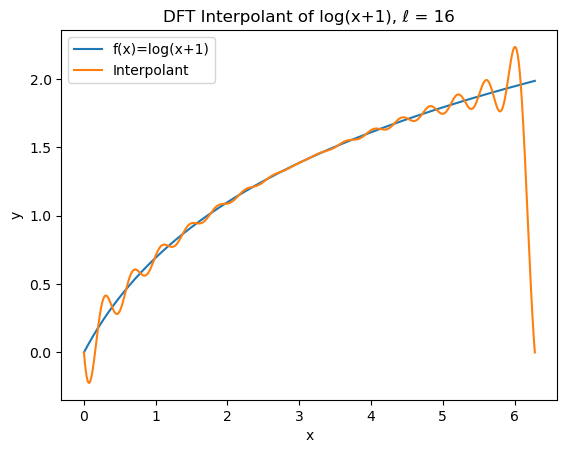

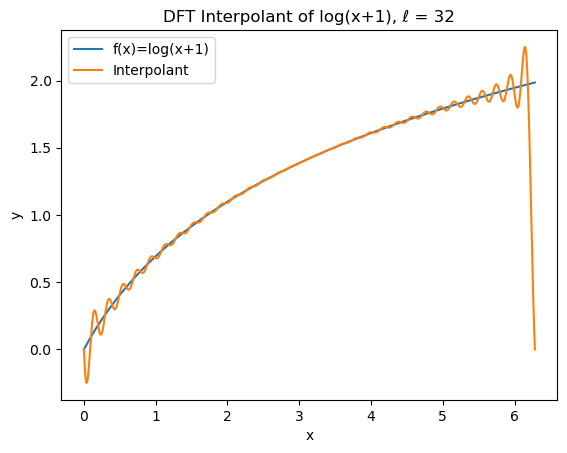

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def interpolate_log(l):
    """Compute trigonometric interpolant of log(x+1) over [0,2π] with cutoff ℓ."""
    m = 2 * l
    xj = 2 * np.pi * np.arange(m) / m
    yj = np.log(xj + 1)
    C = np.fft.fft(yj) / m
    k = np.arange(m)
    k_mod = np.where(k <= l, k, k - m)
    x_fine = np.linspace(0, 2 * np.pi, 1000)
    exp_mat = np.exp(1j * np.outer(k_mod, x_fine))
    pvals = np.real(C @ exp_mat)
    return x_fine, pvals

# True function on fine grid
x_fine = np.linspace(0, 2 * np.pi, 1000)
f_true = np.log(x_fine + 1)

# Interpolant for ℓ = 16
xf16, p16 = interpolate_log(16)
plt.figure()
plt.plot(x_fine, f_true)
plt.plot(xf16, p16)
plt.title('DFT Interpolant of log(x+1), ℓ = 16')
plt.legend(['f(x)=log(x+1)', 'Interpolant'])
plt.xlabel('x')
plt.ylabel('y')

# Interpolant for ℓ = 32
xf32, p32 = interpolate_log(32)
plt.figure()
plt.plot(x_fine, f_true)
plt.plot(xf32, p32)
plt.title('DFT Interpolant of log(x+1), ℓ = 32')
plt.legend(['f(x)=log(x+1)', 'Interpolant'])
plt.xlabel('x')
plt.ylabel('y')

plt.show()
